In [ ]:
!pip install keras-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 71.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=e4c5f43e625989721a990a4108d2adc9d0e6bf725e6488eff9d1b4f3f11827d3
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
data_dir = '.'

import os
import math
import imgaug
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import tensorflow as tf

import keras_ocr

In [ ]:
dataset = keras_ocr.datasets.get_icdar_2013_detector_dataset(
    cache_dir='.',
    skip_illegible=False
)

Looking for ./icdar2013/Challenge2_Training_Task12_Images.zip
Looking for ./icdar2013/Challenge2_Training_Task2_GT.zip


In [ ]:
train, validation = sklearn.model_selection.train_test_split(
    dataset, train_size=0.8, random_state=42
)
augmenter = imgaug.augmenters.Sequential([
    imgaug.augmenters.Affine(
      scale=(1.0, 1.2),
      rotate=(-5, 5)
    ),
    imgaug.augmenters.GaussianBlur(sigma=(0, 0.5)),
    imgaug.augmenters.Multiply((0.8, 1.2), per_channel=0.2)
])
generator_kwargs = {'width': 640, 'height': 640}
training_image_generator = keras_ocr.datasets.get_detector_image_generator(
    labels=train,
    augmenter=augmenter,
    **generator_kwargs
)
validation_image_generator = keras_ocr.datasets.get_detector_image_generator(
    labels=validation,
    **generator_kwargs
)

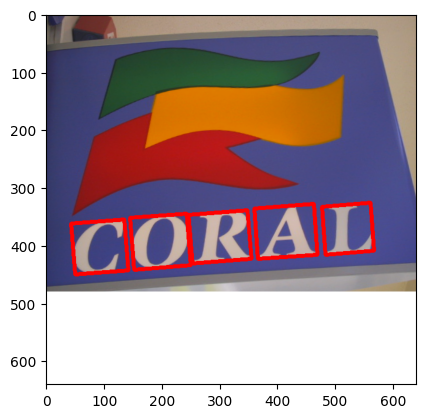

In [ ]:
image, lines, confidence = next(training_image_generator)
canvas = keras_ocr.tools.drawBoxes(image=image, boxes=lines, boxes_format='lines')
plt.imshow(canvas)

In [ ]:
detector = keras_ocr.detection.Detector()

batch_size = 1
training_generator, validation_generator = [
    detector.get_batch_generator(
        image_generator=image_generator, batch_size=batch_size
    ) for image_generator in
    [training_image_generator, validation_image_generator]
]
detector.model.fit(
    training_generator,
    steps_per_epoch=math.ceil(len(train) / batch_size),
    epochs=1000,
    workers=0,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=5),
        tf.keras.callbacks.CSVLogger(os.path.join(data_dir, 'detector.csv')),
        tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(data_dir, 'detector.h5'))
    ],
    validation_data=validation_generator,
    validation_steps=math.ceil(len(validation) / batch_size)
)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Epoch 1/1000
183/183 [==============================] - ETA: 0s - loss: 0.0123

/usr/local/lib/python3.10/dist-packages/keras_ocr/tools.py:601: RuntimeWarning: invalid value encountered in long_scalars
  rotation = np.arctan((tl[0] - bl[0]) / (tl[1] - bl[1]))


183/183 [==============================] - 88s 306ms/step - loss: 0.0123 - val_loss: 0.0091
Epoch 2/1000
183/183 [==============================] - 52s 284ms/step - loss: 0.0107 - val_loss: 0.0107
Epoch 3/1000
183/183 [==============================] - 48s 264ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 4/1000
183/183 [==============================] - 50s 276ms/step - loss: 0.0124 - val_loss: 0.0098
Epoch 5/1000
183/183 [==============================] - 48s 263ms/step - loss: 0.0082 - val_loss: 0.0069
Epoch 6/1000
183/183 [==============================] - 50s 272ms/step - loss: 0.0064 - val_loss: 0.0088
Epoch 7/1000
183/183 [==============================] - 50s 275ms/step - loss: 0.0117 - val_loss: 0.0048
Epoch 8/1000
183/183 [==============================] - 51s 277ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 9/1000
183/183 [==============================] - 52s 284ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 10/1000
183/183 [==============================] - 49s 268ms/s

In [ ]:
results = next(training_generator)
canvas = keras_ocr.tools.drawBoxes(image=image, boxes=lines, boxes_format='lines')
plt.imshow(canvas)

(array([[[[-1.3301653 , -0.54761904,  0.931939  ],
         [-1.1589178 , -0.37254903,  1.0365142 ],
         [-0.9876702 , -0.232493  ,  1.0888017 ],
         ...,
         [-2.117904  , -2.0357141 , -1.8044444 ],
         [-2.117904  , -2.0357141 , -1.8044444 ],
         [-2.117904  , -2.0357141 , -1.8044444 ]],

        [[-1.210292  , -0.42507005,  1.0365142 ],
         [-1.2787911 , -0.47759104,  0.931939  ],
         [-1.141793  , -0.35504204,  0.94936824],
         ...,
         [-2.117904  , -2.0357141 , -1.8044444 ],
         [-2.117904  , -2.0357141 , -1.8044444 ],
         [-2.117904  , -2.0357141 , -1.8044444 ]],

        [[-1.2616663 , -0.46008405,  1.0016558 ],
         [-1.1931673 , -0.39005604,  1.0016558 ],
         [-1.141793  , -0.33753502,  0.94936824],
         ...,
         [-2.117904  , -2.0357141 , -1.8044444 ],
         [-2.117904  , -2.0357141 , -1.8044444 ],
         [-2.117904  , -2.0357141 , -1.8044444 ]],

        ...,

        [[ 2.2489083 ,  2.4285715 ,  

ValueError: ignored

In [ ]:
detector.model.load_weights(os.path.join(data_dir, 'detector.h5'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r '/content/detector.h5' '/content/drive/My Drive'